In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels
from statsmodels import api
import seaborn as sns
seed = 12
np.random.seed(seed)
plt.style.use("seaborn-paper")

In [2]:
df1 = pd.read_csv("1920.csv")
df2 = pd.read_csv("2021.csv")
df  = pd.concat([df1,df2],axis = 0).reset_index(drop=True)
df

,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,WS,OBPM,DBPM,BPM,VORP
0,74,1890,13.6,0.605,0.621,0.181,6.3,15.1,10.8,6.3,0.6,3.8,9.5,13.9,4.8,0.4,0.0,0.4,1.1
1,73,1570,15.4,0.554,0.309,0.243,4.7,13.8,9.4,21.0,2.6,1.2,13.8,14.4,4.4,0.0,1.9,1.9,1.5
2,73,2112,11.3,0.510,0.385,0.190,3.5,8.6,6.1,10.5,1.4,1.1,9.7,25.2,1.2,-2.7,-1.4,-4.1,-1.1
3,73,2042,12.9,0.620,0.401,0.252,3.5,12.4,7.9,8.6,2.4,2.0,12.0,12.7,4.8,-0.6,1.5,0.8,1.5
4,73,2336,24.9,0.605,0.238,0.281,8.0,26.1,17.1,35.2,1.8,1.7,15.8,26.6,9.8,5.5,2.0,7.4,5.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,25,736,14.9,0.537,0.382,0.358,5.3,18.5,11.7,23.0,1.1,2.5,16.5,23.8,0.6,0.5,0.1,0.6,0.5
778,25,648,14.1,0.564,0.311,0.214,6.7,13.9,10.3,11.8,1.3,2.1,11.7,17.2,1.3,-0.1,-0.3,-0.4,0.3
779,25,233,7.7,0.490,0.300,0.200,4.9,19.4,12.2,7.7,1.1,0.8,14.4,14.3,0.1,-4.5,-0.9,-5.4,-0.2
780,25,345,11.8,0.624,0.310,0.423,6.4,10.4,8.4,4.3,2.5,0.5,13.4,12.1,0.8,-1.7,1.3,-0.5,0.1


In [3]:
corr = df.corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr[mask] = np.nan
(corr
 .style
 .background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)
 .highlight_null(null_color='#f1f1f1')  # Color NaNs grey
 .set_precision(2))

C:\Users\lenovo\AppData\Local\Temp\ipykernel_46816\1456668565.py:5: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  (corr


,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,WS,OBPM,DBPM,BPM,VORP
G,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
MP,0.79,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
PER,0.21,0.42,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
TS%,0.27,0.28,0.62,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
3PAr,0.01,-0.02,-0.50,-0.23,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
FTr,0.01,0.08,0.48,0.36,-0.61,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
ORB%,-0.05,-0.15,0.40,0.32,-0.69,0.46,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
DRB%,-0.04,0.00,0.48,0.27,-0.49,0.36,0.71,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
TRB%,-0.04,-0.05,0.49,0.31,-0.61,0.43,0.88,0.96,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
AST%,0.08,0.32,0.41,-0.08,-0.10,0.11,-0.29,-0.11,-0.20,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [4]:
#df.describe()
df.describe().style.background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1).set_precision(2)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_46816\4281890429.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  df.describe().style.background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1).set_precision(2)


,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,WS,OBPM,DBPM,BPM,VORP
count,782.00,782.00,782.00,782.00,782.00,782.00,782.00,782.00,782.00,782.00,782.00,782.00,782.00,782.00,782.00,782.00,782.00,782.00,782.00
mean,51.59,1226.77,14.23,0.56,0.39,0.25,4.71,15.55,10.12,14.17,1.51,1.86,12.25,19.08,2.65,-0.52,-0.01,-0.54,0.67
std,14.03,599.15,4.72,0.06,0.20,0.12,3.74,6.08,4.55,8.78,0.57,1.65,3.69,5.42,2.34,2.53,1.19,2.88,1.20
min,25.00,138.00,3.70,0.37,0.00,0.02,0.00,4.40,3.30,1.70,0.30,0.00,3.50,6.00,-1.90,-6.80,-3.90,-8.70,-1.70
25%,40.00,745.25,10.93,0.53,0.27,0.16,2.10,11.10,6.70,7.60,1.10,0.80,9.70,15.22,0.90,-2.20,-0.90,-2.40,-0.10
50%,54.00,1203.50,13.60,0.56,0.41,0.23,3.30,14.20,9.00,11.20,1.40,1.40,11.90,18.35,2.10,-0.70,-0.10,-0.70,0.30
75%,63.00,1719.25,16.98,0.60,0.54,0.31,6.10,18.90,12.40,18.80,1.80,2.40,14.30,22.40,3.80,0.90,0.70,1.10,1.10
max,74.00,2667.00,31.90,0.74,0.90,0.77,20.20,38.20,26.70,49.10,3.90,8.80,31.00,37.50,15.60,9.10,4.50,12.10,8.80


# Linear Regression 


In [5]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,max_error
# help functions
def plot_function(predictY,Y,title=""):
    plt.figure(figsize=(7,7))
    plt.title(title)
    plt.plot(Y,Y,label = "grouth truth",color='red')
    plt.plot(Y,predictY,"o",color="blue",label = "predict")
    plt.legend()
    

def regression_report(y_true,y_pred,return_dict=False):
    
    if not return_dict:
        print("r2 score : {:.4}".format(r2_score(y_true,y_pred)))
        print("MSE : {:.4}".format(mean_squared_error(y_true,y_pred)))
        print("MAE: {:.4}".format(mean_absolute_error(y_true,y_pred)))
        print("MAX error : {:.4}".format(max_error(y_true,y_pred)))

    if return_dict:
        return {
            "r2" : r2_score(y_true,y_pred),
            "MSE": mean_squared_error(y_true,y_pred),
            "MAE": mean_absolute_error(y_true,y_pred),
            "Max error" : max_error(y_true,y_pred)
        }

In [6]:
X = df.drop(columns=['WS'])
Y = df['WS']

In [7]:
model = api.OLS(Y,X).fit()
print(model.summary(xname=list(X.columns),yname="WS"))

                                 OLS Regression Results                                
Dep. Variable:                     WS   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                              3068.
Date:                Fri, 02 Dec 2022   Prob (F-statistic):                        0.00
Time:                        10:23:51   Log-Likelihood:                         -418.31
No. Observations:                 782   AIC:                                      872.6
Df Residuals:                     764   BIC:                                      956.5
Df Model:                          18                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [8]:
model.params

G       0.006322
MP      0.001184
PER     0.433253
TS%    -3.359012
3PAr    0.554711
FTr     0.817038
ORB%   -0.492353
DRB%   -0.490113
TRB%    0.910908
AST%   -0.030818
STL%   -0.453792
BLK%   -0.151695
TOV%    0.005578
USG%   -0.153623
OBPM   -0.367912
DBPM   -0.052831
BPM    -0.030869
VORP    1.418425
dtype: float64

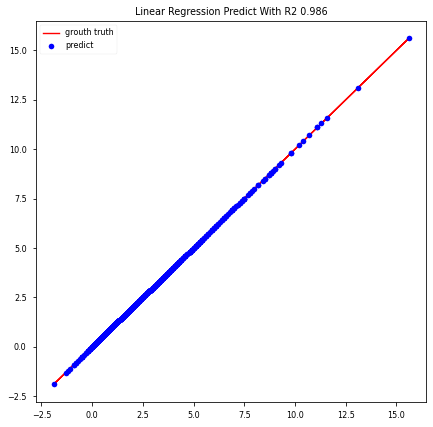

In [9]:
predict = model.predict(X)
plot_function(Y=Y,predictY=Y,title="Linear Regression Predict With R2 0.986")

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
Xtrain,Xval,Ytrain,Yval = train_test_split(X,Y,test_size=0.2,random_state=seed)

In [11]:
model = api.OLS(Ytrain,Xtrain).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                     WS   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              2542.
Date:                Fri, 02 Dec 2022   Prob (F-statistic):                        0.00
Time:                        10:23:52   Log-Likelihood:                         -331.27
No. Observations:                 625   AIC:                                      698.5
Df Residuals:                     607   BIC:                                      778.4
Df Model:                          18                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

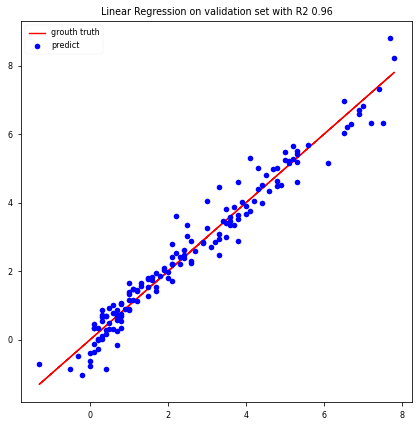

In [12]:
predict = model.predict(Xval)
plot_function(predictY=predict,Y=Yval,title=f"Linear Regression on validation set with R2 {round(r2_score(Yval,predict),2)}")
plt.savefig("linear_regression_all_variables.pdf",bbox_inches='tight')

In [13]:
regression_report(predict,Yval)

r2 score : 0.959
MSE : 0.1837
MAE: 0.3273
MAX error : 1.42


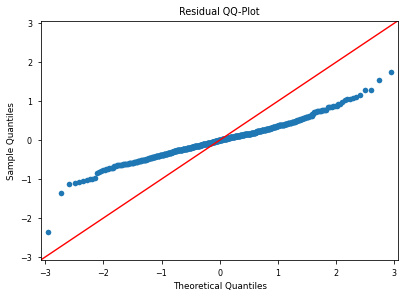

In [14]:
res = model.resid #residuals
fig = api.qqplot(res,line="45")
plt.title("Residual QQ-Plot")
plt.show()

In [15]:
from itertools import combinations
from tqdm.auto import trange,tqdm
def get_best_k(k):
    variables = list(Xtrain.columns)
    result    = []
    for subset in combinations(variables,k):
        subset = list(subset)
        model = api.OLS(Ytrain,Xtrain[subset]).fit()
        predict = model.predict(Xval[subset])
        result.append((subset,r2_score(Yval,predict)))
    return sorted(result,key=lambda x : x[1])[-1]

In [16]:
droped = ["TOV%","DBPM","BPM"]
Xtrain = Xtrain.drop(columns=droped)
Xval   = Xval.drop(columns=droped)

In [17]:
columns= list(Xtrain.columns)
result = []
for n in trange(1,len(columns) + 1):
    result.append(get_best_k(n))

  0%|          | 0/15 [00:00<?, ?it/s]

In [18]:
for i,(subset,r2) in enumerate(result):
    print(sorted(subset),"R2 is",round(r2,5))

['MP'] R2 is 0.60857
['MP', 'VORP'] R2 is 0.87913
['MP', 'ORB%', 'VORP'] R2 is 0.90958
['MP', 'PER', 'USG%', 'VORP'] R2 is 0.93373
['FTr', 'MP', 'PER', 'USG%', 'VORP'] R2 is 0.93899
['FTr', 'MP', 'PER', 'STL%', 'USG%', 'VORP'] R2 is 0.94223
['DRB%', 'MP', 'OBPM', 'PER', 'STL%', 'USG%', 'VORP'] R2 is 0.95207
['AST%', 'DRB%', 'MP', 'OBPM', 'PER', 'STL%', 'USG%', 'VORP'] R2 is 0.95332
['AST%', 'DRB%', 'FTr', 'MP', 'OBPM', 'PER', 'STL%', 'USG%', 'VORP'] R2 is 0.95459
['DRB%', 'FTr', 'MP', 'OBPM', 'ORB%', 'PER', 'STL%', 'TRB%', 'USG%', 'VORP'] R2 is 0.95531
['AST%', 'DRB%', 'FTr', 'MP', 'OBPM', 'ORB%', 'PER', 'STL%', 'TRB%', 'USG%', 'VORP'] R2 is 0.95687
['AST%', 'DRB%', 'FTr', 'MP', 'OBPM', 'ORB%', 'PER', 'STL%', 'TRB%', 'TS%', 'USG%', 'VORP'] R2 is 0.95694
['AST%', 'BLK%', 'DRB%', 'FTr', 'MP', 'OBPM', 'ORB%', 'PER', 'STL%', 'TRB%', 'TS%', 'USG%', 'VORP'] R2 is 0.95708
['3PAr', 'AST%', 'BLK%', 'DRB%', 'FTr', 'MP', 'OBPM', 'ORB%', 'PER', 'STL%', 'TRB%', 'TS%', 'USG%', 'VORP'] R2 is 0.95815


In [19]:
best = result[6][0]
best

['MP', 'PER', 'DRB%', 'STL%', 'USG%', 'OBPM', 'VORP']

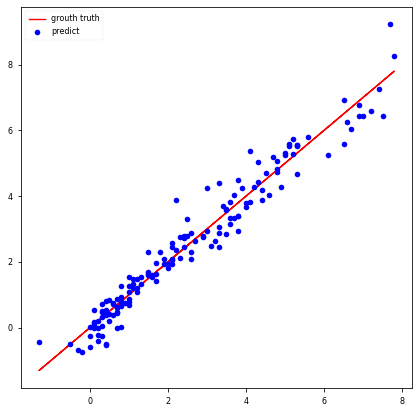

In [20]:
model = api.OLS(Ytrain,Xtrain[best]).fit()
predict= model.predict(Xval[best])
plot_function(predict,Yval)
plt.savefig("best_comb_linear.pdf",bbox_inches='tight')

In [21]:
regression_report(predict,Yval)

r2 score : 0.9538
MSE : 0.2112
MAE: 0.3456
MAX error : 1.679


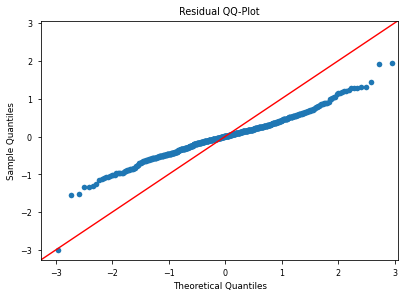

In [22]:
res = model.resid #residuals
fig = api.qqplot(res,line="45")
plt.title("Residual QQ-Plot")

plt.savefig("residual_qq.pdf",bbox_inches='tight')
plt.show()

D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


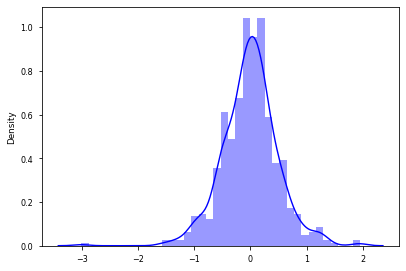

In [23]:
sns.distplot(res,color="blue")
plt.savefig("res.pdf",bbox_inches='tight')

## Lasso Regression



In [24]:
from sklearn.linear_model import Lasso

In [25]:
alphas   = np.linspace(0.1,10,100) # if alpha is zero,it is Linear Regression
r2_scores= [] 
for alpha in alphas:
    model = Lasso(alpha=alpha,random_state=seed).fit(Xtrain,Ytrain)
    r2_scores.append(r2_score(Yval,model.predict(Xval)))
    

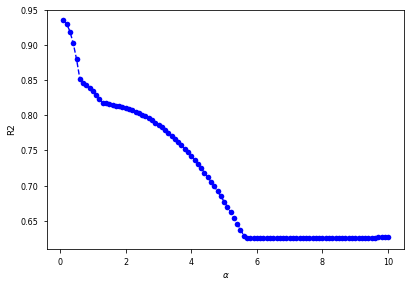

In [26]:
plt.plot(alphas,r2_scores,"b--o")
plt.xlabel(r"$\alpha$")
plt.ylabel("R2")
plt.savefig("lasso.pdf",bbox_inches='tight')
plt.show()

In [108]:
import eli5 # pip install eli5
best_alpha = 0.05
model = Lasso(alpha=best_alpha).fit(Xtrain,Ytrain)
eli5.explain_weights_sklearn(model,feature_names = list(Xtrain.columns),target_names=['WS'])

Weight?,Feature
+1.246,VORP
+0.196,PER
+0.017,G
+0.004,ORB%
+0.001,MP
-0.005,DRB%
-0.020,AST%
-0.026,BLK%
-0.042,STL%
-0.071,BPM


In [109]:
regression_report(model.predict(Xval),Yval)

r2 score : 0.9423
MSE : 0.2565
MAE: 0.384
MAX error : 1.893


# KNN Regression 

In [28]:
from sklearn.neighbors import KNeighborsRegressor
Xtrain,Xval,Ytrain,Yval = train_test_split(X,Y,test_size=0.2,random_state=seed)

In [29]:
metrics = ["manhattan","euclidean","cosine","l1"]
neighbors= [1,2,3,5,10]

In [30]:
record = {
    "distance" : [],
    "neighbors" : []
}
for m in metrics : 
    for n in neighbors:
        knn = KNeighborsRegressor(n_neighbors=n,metric=m).fit(Xtrain,Ytrain)
        predict_val = knn.predict(Xval)
        response    = regression_report(y_pred=predict_val,y_true=Yval,return_dict=True)
        for k in response:
            if k not in record:
                record[k] = []
            record[k].append(round(response[k],4))
        record["distance"].append(m)
        record['neighbors'].append(n)
record = pd.DataFrame(record)

In [31]:
record

,distance,neighbors,r2,MSE,MAE,Max error
0,manhattan,1,0.6278,1.6397,0.9178,5.5000
1,manhattan,2,0.6941,1.3479,0.8602,3.9500
2,manhattan,3,0.7293,1.1924,0.7834,3.4333
3,manhattan,5,0.6937,1.3494,0.7992,3.8200
4,manhattan,10,0.6693,1.4571,0.8251,4.6800
5,euclidean,1,0.5495,1.9846,1.0516,5.5000
6,euclidean,2,0.5759,1.8685,0.9828,5.1000
7,euclidean,3,0.6359,1.6041,0.8926,4.9667
8,euclidean,5,0.5605,1.9362,0.9586,5.4200
9,euclidean,10,0.5514,1.9766,0.9199,6.3400


## Random Forest

In [41]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [43]:
parameters = {
    "n_estimators" : [10,20,30,40,50,100,200],
    "max_depth" : [1,5,10,20,None],
    "bootstrap" : [True,False],
    "criterion" : ['squared_error','absolute_error','poisson']
}

In [63]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

clf = GridSearchCV(RandomForestRegressor(verbose=True,n_jobs=-1,random_state=seed),
                   param_grid=parameters,
                   n_jobs=-1,
                   cv=5,verbose=True,scoring="r2")

In [64]:
clf.fit(X,Y)

Fitting 5 folds for each of 210 candidates, totalling 1050 fits


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.0s finished


GridSearchCV(cv=5,
             estimator=RandomForestRegressor(n_jobs=-1, random_state=12,
                                             verbose=True),
             n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['squared_error', 'absolute_error',
                                       'poisson'],
                         'max_depth': [1, 5, 10, 20, None],
                         'n_estimators': [10, 20, 30, 40, 50, 100, 200]},
             scoring='r2', verbose=True)

In [68]:
clf.best_score_

0.9029482466301157

In [69]:
best_parameters = clf.best_params_
best_parameters

{'bootstrap': True,
 'criterion': 'absolute_error',
 'max_depth': 10,
 'n_estimators': 20}

In [70]:
pd.DataFrame(clf.cv_results_).dropna(axis = 0)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_criterion,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.034398,0.003263,0.038199,0.008518,True,squared_error,1,10,"{'bootstrap': True, 'criterion': 'squared_erro...",0.394910,0.626867,0.567030,0.662146,-0.443209,0.361549,0.412728,122
1,0.060198,0.006553,0.024199,0.010797,True,squared_error,1,20,"{'bootstrap': True, 'criterion': 'squared_erro...",0.407587,0.636495,0.569950,0.673141,-0.409570,0.375521,0.402960,118
2,0.072598,0.012208,0.048201,0.041180,True,squared_error,1,30,"{'bootstrap': True, 'criterion': 'squared_erro...",0.407286,0.633054,0.569558,0.673026,-0.397628,0.377059,0.397804,117
3,0.103200,0.025286,0.036200,0.013847,True,squared_error,1,40,"{'bootstrap': True, 'criterion': 'squared_erro...",0.408497,0.638154,0.572244,0.676021,-0.391982,0.380587,0.396987,115
4,0.107800,0.020663,0.031801,0.006013,True,squared_error,1,50,"{'bootstrap': True, 'criterion': 'squared_erro...",0.406685,0.633466,0.571148,0.682380,-0.395012,0.379733,0.398390,116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,1.319999,0.230840,0.524601,0.156315,False,absolute_error,20,30,"{'bootstrap': False, 'criterion': 'absolute_er...",0.801920,0.860573,0.874507,0.828601,0.742505,0.821621,0.046926,68
164,1.761398,0.158856,1.094000,0.065936,False,absolute_error,20,40,"{'bootstrap': False, 'criterion': 'absolute_er...",0.801383,0.860113,0.873310,0.830368,0.740499,0.821135,0.047369,73
165,2.391799,0.291466,1.388400,0.572370,False,absolute_error,20,50,"{'bootstrap': False, 'criterion': 'absolute_er...",0.801793,0.860927,0.873033,0.830772,0.742568,0.821819,0.046721,67
166,4.881999,0.791660,1.823400,0.250163,False,absolute_error,20,100,"{'bootstrap': False, 'criterion': 'absolute_er...",0.802180,0.860616,0.871468,0.831988,0.743946,0.822040,0.045877,65


In [82]:
best_rf = RandomForestRegressor(**best_parameters,random_state=seed).fit(Xtrain,Ytrain)
predict = best_rf.predict(Xval)

In [83]:
regression_report(Yval,predict)

r2 score : 0.9154
MSE : 0.3727
MAE: 0.4303
MAX error : 2.313


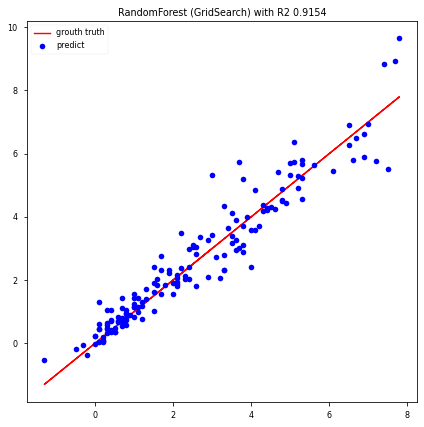

In [87]:
plot_function(predict,Yval,title=f"RandomForest (GridSearch) with R2 {0.9154}")
plt.savefig("rf_cv.pdf",bbox_inches='tight')

In [88]:
best_rf.feature_importances_

array([0.04236708, 0.07235114, 0.01501684, 0.05377391, 0.026637  ,
       0.01487696, 0.01742072, 0.00745952, 0.0092501 , 0.01633868,
       0.014447  , 0.01032689, 0.01181467, 0.01215844, 0.01176585,
       0.01369726, 0.07760746, 0.57269049])

In [89]:
best_rf.feature_names_in_

array(['G', 'MP', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%',
       'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OBPM', 'DBPM', 'BPM',
       'VORP'], dtype=object)

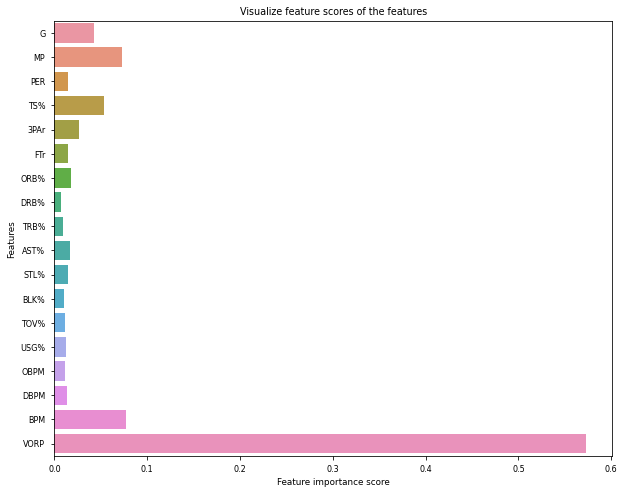

In [101]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.barplot(x=best_rf.feature_importances_, y=best_rf.feature_names_in_)
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(best_rf.feature_names_in_)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.savefig("rf_feature_importance.pdf",bbox_inches='tight')
plt.show()